In [2]:
import pandas as pd
import seaborn as sns
import statsmodels
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, theme, ggsave

import warnings
warnings.filterwarnings("ignore")

In [3]:
# base
link = 'https://raw.githubusercontent.com/jacobwright32/Web_Scraper_AI_Core_Project/bb4865ae568e23ab8fadb6ea58cf117df2164ef3/web%20scraping/Cleaned%20Data/Brazil_Sao%20Bernardo%20Do%20Campo_Cleaned.csv'
c = pd.read_csv(link)

## a) Gráfico
* Analise a relação entre entre cobertura de nuvens (cloud_coverage) e temperatura máxima (maximum_temperature). Para isso, plote gráficos com a relação bivariada, use coeficiente de correlação ou um modelo linear (OLS). Descreva os resultados que encontrar.

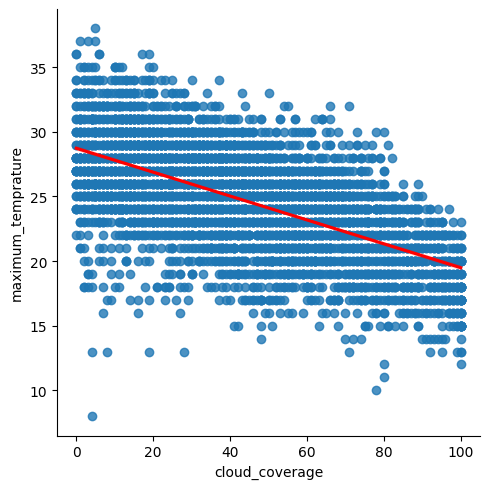

In [4]:
sns.lmplot(x='cloud_coverage', y='maximum_temprature', data=c, fit_reg=True, line_kws={'color': 'red'}) 

Quanto maior a cloud_coverage, menor é a temperatura máxima observada.

## b) Exploração
* Existe alguma outra variável na base com maior correção com a temperatura máxima? Novamente, registre os resultados que encontrar.

In [5]:
c.corr().round(2)

,maximum_temprature,minimum_temprature,wind_speed,amount_of_rain,humidity,cloud_coverage,pressure
maximum_temprature,1.00,0.69,-0.35,-0.07,-0.60,-0.60,-0.49
minimum_temprature,0.69,1.00,-0.11,0.22,-0.29,-0.08,-0.68
wind_speed,-0.35,-0.11,1.00,0.00,0.01,0.30,0.03
amount_of_rain,-0.07,0.22,0.00,1.00,0.30,0.38,-0.30
humidity,-0.60,-0.29,0.01,0.30,1.00,0.64,0.04
cloud_coverage,-0.60,-0.08,0.30,0.38,0.64,1.00,-0.01
pressure,-0.49,-0.68,0.03,-0.30,0.04,-0.01,1.00


Há duas outras variáveis com correlação igual ou superior a de maximum_temprature com cloud_coverage: minimum_temprature (0.69) e humidity (-0.60). Obvio que minimum_temperature é esperado estar correlacionado com minimum_temperature.\
Olhar melhor a relação com **humidity**.

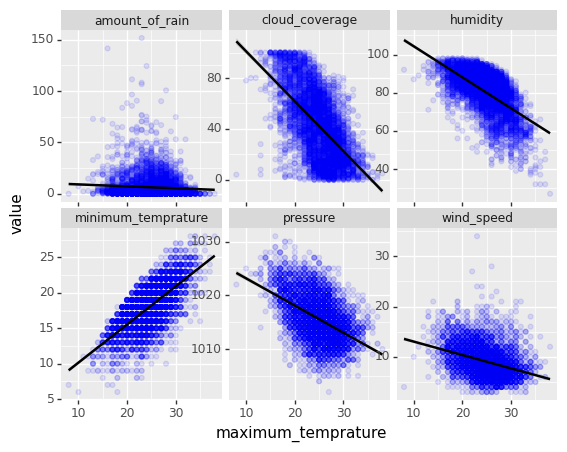

<ggplot: (102556169868)>

In [6]:
c_numeric = c.select_dtypes(include=['int64', 'float64'])
c_numeric_melt = (
    pd.melt(
        c_numeric, 
        id_vars=['maximum_temprature'], 
        var_name='variavel', 
        value_name='value'
        )
        )

plot1 = (
    ggplot(c_numeric_melt, aes('maximum_temprature', 'value'))
        + geom_point(color='blue', alpha=0.1)
        + stat_smooth(method='lm')
        + facet_wrap('~variavel', scales='free')
)
# ggsave(plot=plot1, filename='grafico.png', dpi=1000)
plot1

## d) Modelo
* Rode modelos lineares simples (por mínimos quadrados ordinários) para predizer a temperatura máxima diária em São Bernardo do Campo (SP). Use as 
variáveis que quiser, faça transformações nelas se necessário, e reporte alguns resultados do melhor modelo que encontrar.

In [7]:
X = c[['humidity', 'cloud_coverage', 'minimum_temprature']]
y = c.maximum_temprature
reg = LinearRegression().fit(X, y)

## e) Comparação
* Salve as predições do seu modelo treinado no exercício anterior e compare com os valores reais de temperatura máxima (vale usar gráficos).

In [8]:
y_pred = reg.predict(X)
c['y_pred'] = y_pred
sns.lmplot(x='maximum_temprature', y='y_pred', data=c, fit_reg=True, line_kws={'color': 'red'})

# 2) Sorteios
## a) Umidade
* Crie uma função (ou um código) para sortear 1000 observações do banco de dados climáticos, calcular a média de umidade (humidity).

In [9]:
def get_humidity_sample_avg(df, column='humidity'):
    amostra = df[column].sample(1000)
    return amostra.mean()

## b) Histograma
* Com a função criada anteriormente, calcule 1000 médias de amostras de humidity e plote a distribuição como um histograma.

In [10]:
humidity_mean = [get_humidity_sample_avg(c) for _ in range(1000)]
sns.histplot(humidity_mean)

<AxesSubplot:xlabel='maximum_temprature', ylabel='y_pred'>

# c) Modelos lineares
* Modifique a função criada anteriormente para, depois de sortear 1000 observações do banco, rodar um modelo de regressão linear para predizer valores de humidity e extrair o r2 do modelo.\
Dica:\
from matplotlib import pyplot as plt\
plt.savefig('grafico.png')

In [11]:
def get_humidity_reg_score(df):
    y_amostra = df['humidity'].sample(1000)
    X = df[['maximum_temprature', 'cloud_coverage', 'minimum_temprature']].sample(1000)
    reg = LinearRegression().fit(X, y_amostra)
    return reg.score(X, y_amostra), reg.predict(X)

In [12]:
resultados_humidity = get_humidity_reg_score(c)
r2_reg_humidity = resultados_humidity[0]
humidity_pred = resultados_humidity[1]
c_amostra = c.sample(1000)
c_amostra['humidity_pred'] = humidity_pred

In [13]:
sns.lmplot(x='humidity', y='humidity_pred', data=c_amostra, fit_reg=True, line_kws={'color': 'red'})
print(f'O R² deste modelo é igual a {r2_reg_humidity.round(4)}')

O R² deste modelo é igual a 0.0036


# 3) Frameworks
* Ainda usando a base carregada anteriormente, use um framework para estimar um modelo de regressão tendo humidity como target. Dicas: siga os tutoriais do mlr3, para R, ou do sci-kit learn, para Python. Não se preocupe em usar os frameworks perfeitamente, o importante é ganhar familiaridade com eles.